In [1]:
pip install tensorflow scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [ ]:
import pandas as pd
df.dropna(inplace=True)

In [7]:
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [8]:
train_dir = "/Users/sreyakaruturi/Downloads/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/train"
test_dir = "/Users/sreyakaruturi/Downloads/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/test"

In [9]:
def load_images(directory, batch_size=1024):
    images = []
    labels = []
    label_encoder = LabelEncoder()

    for label in os.listdir(directory):
        label_path = os.path.join(directory, label)
        if os.path.isdir(label_path):
            files = os.listdir(label_path)
            random.shuffle(files)  # Shuffle the files to load a random subset
            for image_file in files[:batch_size]:
                image_path = os.path.join(label_path, image_file)
                # Load and preprocess images as needed
                img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
                img = tf.keras.preprocessing.image.img_to_array(img)
                img = tf.keras.applications.resnet50.preprocess_input(img)

                images.append(img)
                labels.append(label)

    labels = label_encoder.fit_transform(labels)

    return np.array(images), np.array(labels)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=1024,  # Adjust batch size as needed
    class_mode='sparse'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1024,
    class_mode='sparse'
)

Found 32398 images belonging to 3 classes.
Found 10500 images belonging to 3 classes.


In [11]:
X_train, y_train = load_images(train_dir)
X_test, y_test = load_images(test_dir)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)

In [17]:
def create_cnn_model(input_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))  # Adjust output layer based on the number of classes

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model
input_shape = X_train[0].shape
cnn_model = create_cnn_model(input_shape)
cnn_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test)
print(f"CNN Model Accuracy: {cnn_accuracy}")

Epoch 1/20
77/77 [==============================] - 30s 383ms/step - loss: 36.3136 - accuracy: 0.7550 - val_loss: 0.3649 - val_accuracy: 0.8732
Epoch 2/20
77/77 [==============================] - 28s 367ms/step - loss: 0.3777 - accuracy: 0.8779 - val_loss: 0.4029 - val_accuracy: 0.8504
Epoch 3/20
77/77 [==============================] - 28s 365ms/step - loss: 0.2300 - accuracy: 0.9223 - val_loss: 0.4145 - val_accuracy: 0.8520
Epoch 4/20
77/77 [==============================] - 29s 371ms/step - loss: 0.1990 - accuracy: 0.9373 - val_loss: 0.4011 - val_accuracy: 0.8780
Epoch 5/20
77/77 [==============================] - 28s 367ms/step - loss: 0.1395 - accuracy: 0.9589 - val_loss: 0.4434 - val_accuracy: 0.8911
Epoch 6/20
77/77 [==============================] - 27s 355ms/step - loss: 0.0529 - accuracy: 0.9841 - val_loss: 0.4441 - val_accuracy: 0.8992
Epoch 7/20
77/77 [==============================] - 29s 376ms/step - loss: 0.0947 - accuracy: 0.9809 - val_loss: 0.5496 - val_accuracy: 0.840

In [26]:
def create_cnn_model(input_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3‹‹‹, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))  

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model
input_shape = X_train[0].shape
cnn_model = create_cnn_model(input_shape)
history_transfer_learning = cnn_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test)
print(f"CNN Model Accuracy: {cnn_accuracy}")

Epoch 1/20
77/77 [==============================] - 28s 361ms/step - loss: 27.0581 - accuracy: 0.7473 - val_loss: 0.4900 - val_accuracy: 0.7984
Epoch 2/20
77/77 [==============================] - 28s 361ms/step - loss: 0.4272 - accuracy: 0.8657 - val_loss: 0.3357 - val_accuracy: 0.8683
Epoch 3/20
77/77 [==============================] - 28s 360ms/step - loss: 0.2535 - accuracy: 0.9166 - val_loss: 0.3531 - val_accuracy: 0.8748
Epoch 4/20
77/77 [==============================] - 28s 357ms/step - loss: 0.1573 - accuracy: 0.9487 - val_loss: 0.3989 - val_accuracy: 0.8943
Epoch 5/20
77/77 [==============================] - 27s 354ms/step - loss: 0.1004 - accuracy: 0.9670 - val_loss: 0.3065 - val_accuracy: 0.9203
Epoch 6/20
77/77 [==============================] - 27s 353ms/step - loss: 0.0924 - accuracy: 0.9752 - val_loss: 0.3673 - val_accuracy: 0.9057
Epoch 7/20
77/77 [==============================] - 27s 353ms/step - loss: 0.0483 - accuracy: 0.9837 - val_loss: 0.3942 - val_accuracy: 0.902

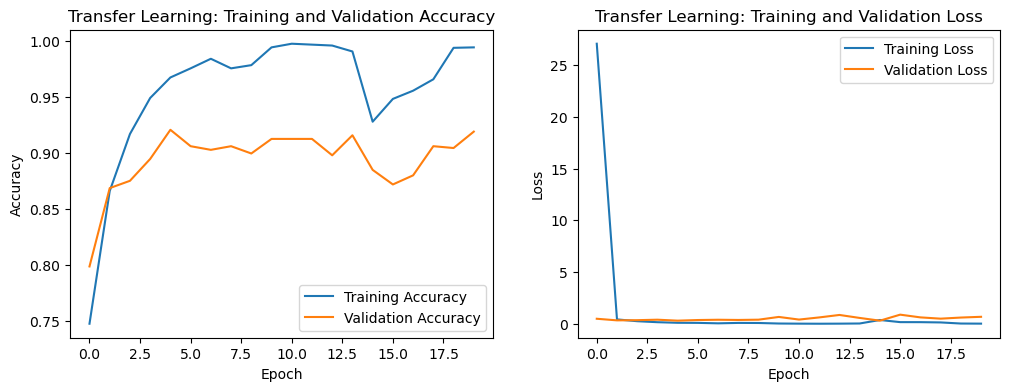

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_transfer_learning.history['accuracy'], label='Training Accuracy')
plt.plot(history_transfer_learning.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Transfer Learning: Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_transfer_learning.history['loss'], label='Training Loss')
plt.plot(history_transfer_learning.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Transfer Learning: Training and Validation Loss')
plt.legend()

plt.show()

96/96 [==============================] - 60s 618ms/step


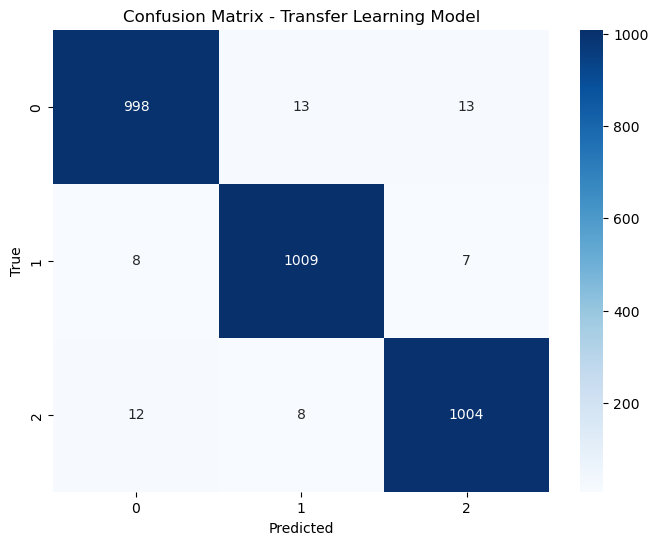

Transfer Learning Model Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1024
           1       0.98      0.99      0.98      1024
           2       0.98      0.98      0.98      1024

    accuracy                           0.98      3072
   macro avg       0.98      0.98      0.98      3072
weighted avg       0.98      0.98      0.98      3072



In [28]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = transfer_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Decode labels using LabelEncoder (assuming you used LabelEncoder during training)
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Transfer Learning Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Convert label_encoder.classes_ to a list of strings
class_names = list(map(str, label_encoder.classes_))

# Print classification report
print("Transfer Learning Model Classification Report:")
print(classification_report(y_test_encoded, y_pred_classes, target_names=class_names))


In [18]:
dense_model = models.Sequential([
    layers.Flatten(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')
])
dense_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
dense_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))
dense_loss, dense_accuracy = dense_model.evaluate(X_test, y_test)
print(f"Dense Model Accuracy: {dense_accuracy}")

Epoch 1/20
77/77 [==============================] - 4s 49ms/step - loss: 1349.3744 - accuracy: 0.7501 - val_loss: 931.7421 - val_accuracy: 0.8146
Epoch 2/20
77/77 [==============================] - 3s 33ms/step - loss: 645.1197 - accuracy: 0.8311 - val_loss: 619.2753 - val_accuracy: 0.8407
Epoch 3/20
77/77 [==============================] - 2s 32ms/step - loss: 518.9314 - accuracy: 0.8506 - val_loss: 688.0416 - val_accuracy: 0.8146
Epoch 4/20
77/77 [==============================] - 3s 33ms/step - loss: 359.5281 - accuracy: 0.8824 - val_loss: 558.0882 - val_accuracy: 0.8228
Epoch 5/20
77/77 [==============================] - 3s 44ms/step - loss: 204.4301 - accuracy: 0.8962 - val_loss: 517.4319 - val_accuracy: 0.8293
Epoch 6/20
77/77 [==============================] - 4s 52ms/step - loss: 192.2399 - accuracy: 0.8946 - val_loss: 501.9834 - val_accuracy: 0.8098
Epoch 7/20
77/77 [==============================] - 4s 46ms/step - loss: 135.6953 - accuracy: 0.9162 - val_loss: 328.3933 - val_a

In [18]:
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.trainable = False

transfer_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')
])
transfer_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_transfer_learning = transfer_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))
transfer_loss, transfer_accuracy = transfer_model.evaluate(X_test, y_test)
print(f"Transfer Learning Model Accuracy: {transfer_accuracy}")

Epoch 1/20
77/77 [==============================] - 60s 767ms/step - loss: 0.1985 - accuracy: 0.9304 - val_loss: 0.1113 - val_accuracy: 0.9626
Epoch 2/20
77/77 [==============================] - 59s 763ms/step - loss: 0.0642 - accuracy: 0.9776 - val_loss: 0.2023 - val_accuracy: 0.9382
Epoch 3/20
77/77 [==============================] - 58s 760ms/step - loss: 0.0411 - accuracy: 0.9858 - val_loss: 0.1037 - val_accuracy: 0.9659
Epoch 4/20
77/77 [==============================] - 58s 761ms/step - loss: 0.0194 - accuracy: 0.9939 - val_loss: 0.1141 - val_accuracy: 0.9642
Epoch 5/20
77/77 [==============================] - 59s 763ms/step - loss: 0.0181 - accuracy: 0.9939 - val_loss: 0.0953 - val_accuracy: 0.9659
Epoch 6/20
77/77 [==============================] - 59s 763ms/step - loss: 0.0081 - accuracy: 0.9976 - val_loss: 0.0945 - val_accuracy: 0.9707
Epoch 7/20
77/77 [==============================] - 58s 757ms/step - loss: 0.0103 - accuracy: 0.9967 - val_loss: 0.0969 - val_accuracy: 0.9756

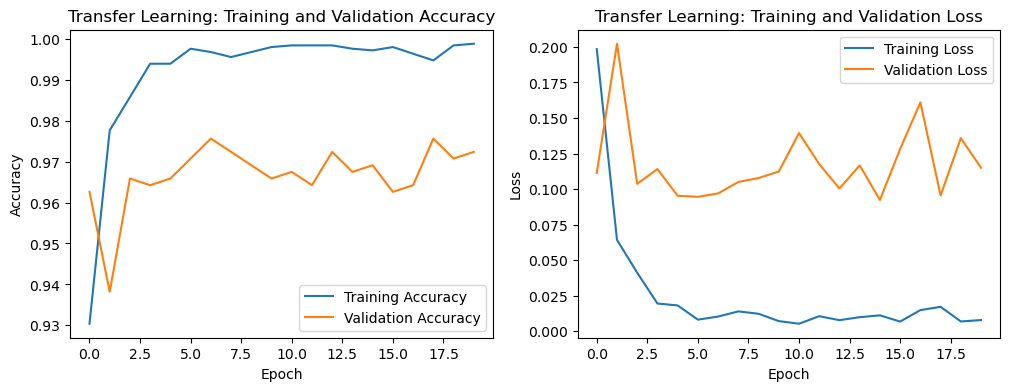

In [20]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_transfer_learning.history['accuracy'], label='Training Accuracy')
plt.plot(history_transfer_learning.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Transfer Learning: Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_transfer_learning.history['loss'], label='Training Loss')
plt.plot(history_transfer_learning.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Transfer Learning: Training and Validation Loss')
plt.legend()

plt.show()

96/96 [==============================] - 60s 623ms/step


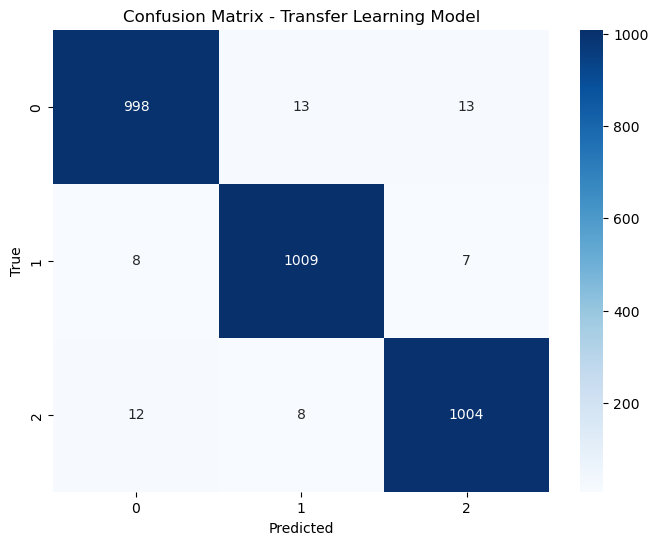

Transfer Learning Model Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1024
           1       0.98      0.99      0.98      1024
           2       0.98      0.98      0.98      1024

    accuracy                           0.98      3072
   macro avg       0.98      0.98      0.98      3072
weighted avg       0.98      0.98      0.98      3072



In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = transfer_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Decode labels using LabelEncoder (assuming you used LabelEncoder during training)
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Transfer Learning Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Convert label_encoder.classes_ to a list of strings
class_names = list(map(str, label_encoder.classes_))

# Print classification report
print("Transfer Learning Model Classification Report:")
print(classification_report(y_test_encoded, y_pred_classes, target_names=class_names))
